The t-distribution is an alternative to the standard normal distribution used when the  sample size is small **(n <30)**.  As the number of samples increases, the t-distribution becomes more and more similar to the standard normal distribution (z-distribution). 

the t-distribution allows for a larger probability of values appearing in the tails.



# When to use a t-test?
One of the most common uses of a t-test is to determine whether the means of two groups are different.

examples:
- Are the heights of males and females different?
- Are the star ratings of two brands of shoes different?
- Is the number of laughs occurring between a movie and its sequel different?
- Is the resting heart rate lower after an exercise program?
- Is the number of subscriptions obtained from a website with a red subscribe button higher than from a website with a green subscribe button?

The main types of t-tests are 

- independent (between groups) -when different participants are in each group (such as heights of males and females) 
scipy.stats.ttest_ind (documentation)

- dependent (repeated measures, "paired t-test" - often considered "pre/post" and is used when the same participants are in both groups (such as the resting heart rates of the same participants measured before and after the exercise program)
scipy.stats.ttest_rel (documentation)

- one sample t-tests compare the mean of one group to a well-established mean
scipy.stats.ttest_1samp (documentation)

## Example: Question: do males and females have different average heights?


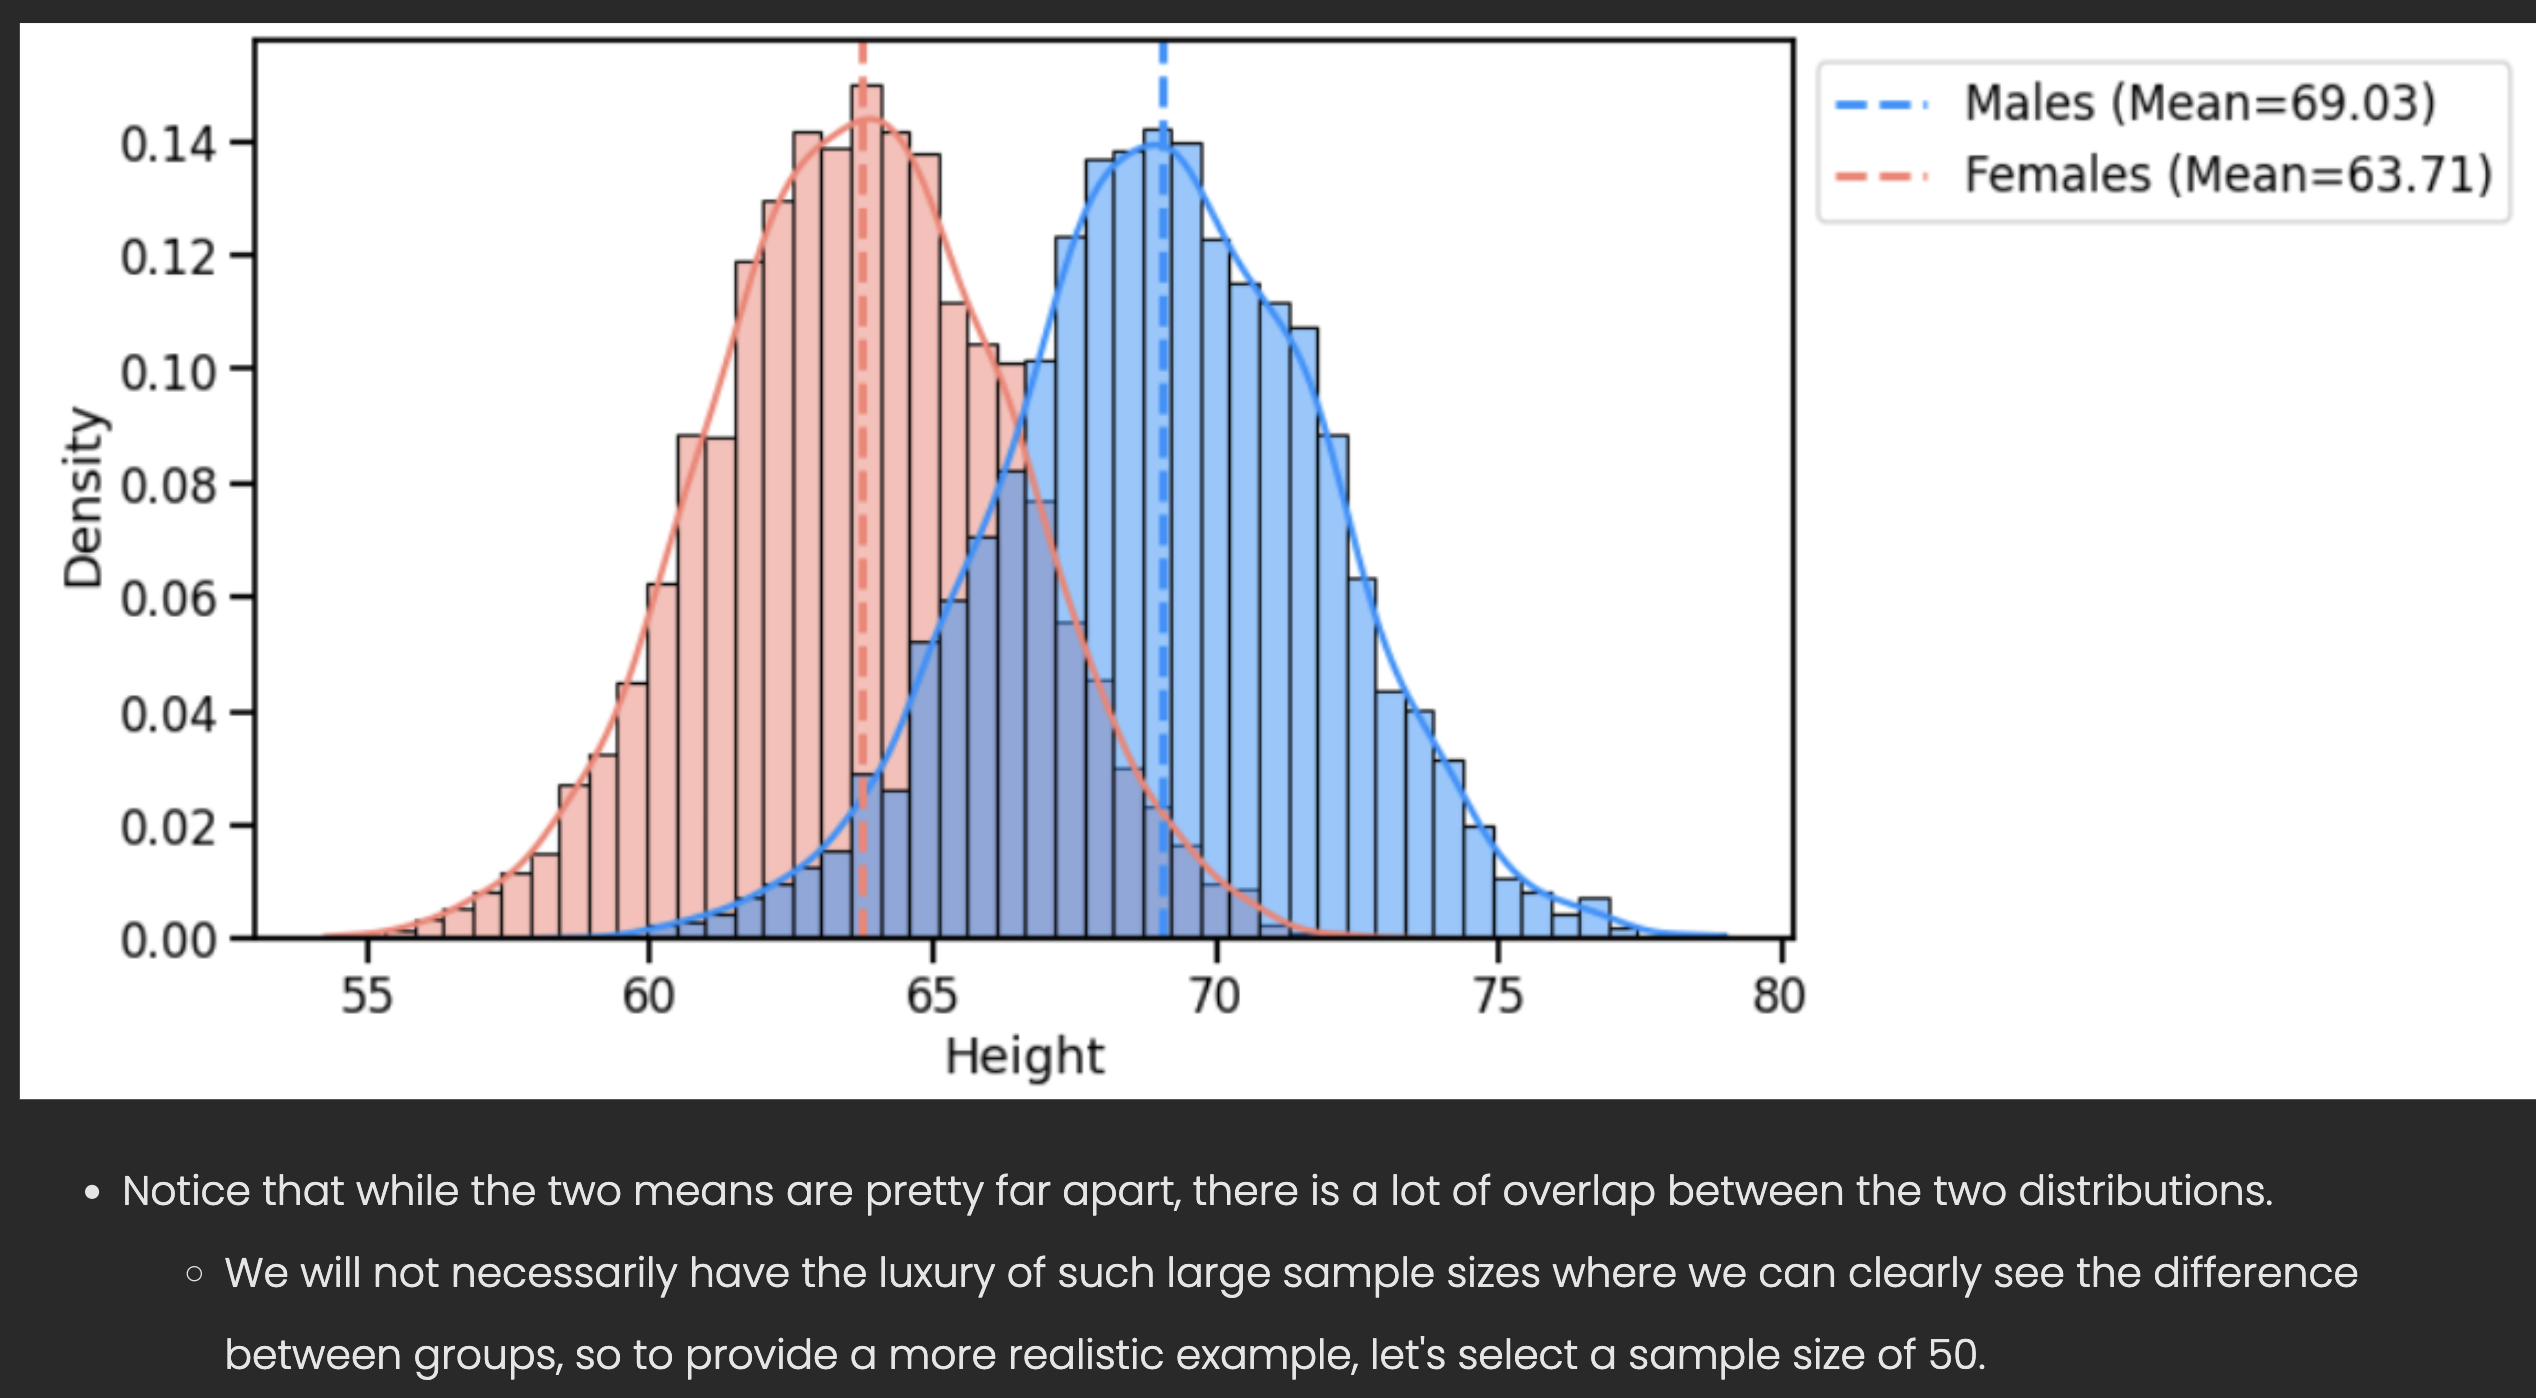

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv")
sample = df.sample(n=50,random_state=42)
female_height = sample.loc[ sample['Gender']=='Female',"Height"]
male_height = sample.loc[ sample['Gender']=='Male',"Height"]
## Getting means for gender height
print(f"For Males (n={len(male_height)}): Mean={np.mean(male_height):.2f}")
print(f"For Females (n={len(female_height)}): Mean={np.mean(female_height):.2f}")

For Males (n=27): Mean=68.90
For Females (n=23): Mean=64.13


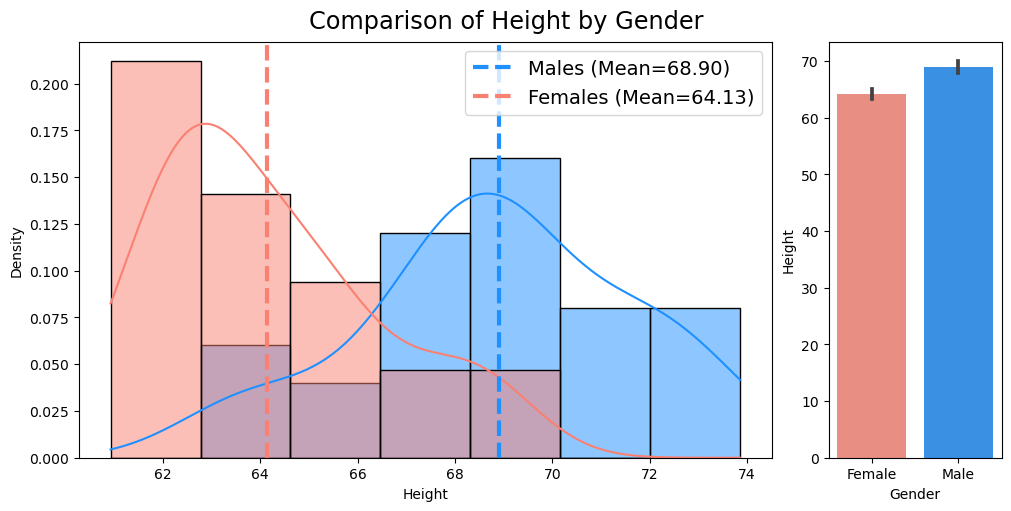

In [6]:
gender_palette={'Male':'dodgerblue', "Female":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='Height',fill=True,hue='Gender',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(male_height), ls='--',lw=3, 
           label=f"Males (Mean={np.mean(male_height):.2f})",color=gender_palette['Male'])

ax.axvline(np.mean(female_height), ls='--', lw=3, 
           label=f"Females (Mean={np.mean(female_height):.2f})",color=gender_palette['Female'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='Gender',y='Height',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Height by Gender',fontsize='xx-large');

# Hypothesis 

As you can see, the means are clearly different, but we will use the t-test to determine if this difference is statistically significant or if it is just due to randomness in our samples.

Before we can begin testing our assumptions, we must formally declare our null and alternative hypothesis and set our alpha level. 

- Null Hypothesis: Males and females have the same average height. (There is no statistical significance between the heights of the groups)

- Alternative Hypothesis: Males and females have different average heights. (There is a statistical significance between the heights of the two groups)

- Alpha: We will be using an alpha=.05



# Test Assumptions 
First, we recognize that males and females must be from different groups, so we will want to perform an independent t-test.

Just because we WANT to perform an independent t-test (or any test) doesn't mean that the test is appropriate for our data.   Each statistical test has some assumptions that must be met in order to trust the resulting test statistic and p-value.  By building our background knowledge of distributions throughout the week, we have been building up to this point where you can better understand such assumptions!

There are three main assumptions that we must test before trusting the results of an independent t-test. 

- No significant outliers
- Normality 
- Equal Variance 

## Testing for Outliers

In [8]:
# zscore > 3 is outlier
zscores_f = stats.zscore(female_height)
outliers_f = abs(zscores_f)>3
print(np.sum(outliers_f))

zscores_m = stats.zscore(male_height)
outliers_m = abs(zscores_m)>3
np.sum(outliers_m)


0


0

## Test Each Group for Normality

In [9]:
# normal test on both bender
result_m = stats.normaltest(male_height)
result_f = stats.normaltest(female_height)
print(result_m)
print(result_f)
#For both the male and female groups, the p-value is greater than 0.05, 
#so we can assume these are normal distributions.

#If the normality test is NOT met, you can proceed if there is a large sample.

#For a two-sample t-test, if each group is 15, the sample size is large enough to proceed.

NormaltestResult(statistic=0.33615904712566513, pvalue=0.8452866118088072)
NormaltestResult(statistic=2.8307141616584417, pvalue=0.2428388848547339)


## Testing for Equal Variance with Levene's test

Equal variance indicates that the variance is approximately the same across the samples.  This is also known as the assumption of homoscedasticity or the homogeneity of variances.   Just like with normality, it can be assessed with a simple test as long as you know which test and you know how to interpret p-values!  The test we will use is called Levene's test

In [10]:
result = stats.levene(female_height, male_height)
result

#Since our p-value was >.05, we accept that our groups DO have equal variance, 
#and we have met the assumption of homogeneity of variances.

LeveneResult(statistic=0.4550154927872889, pvalue=0.5031988559709122)

# Independent t-test

In [12]:
## Final t-test, after confirming we meet the assumptions
result = stats.ttest_ind(female_height,male_height)
print(result)

## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

Ttest_indResult(statistic=-6.700593917991493, pvalue=2.1170736038110527e-08)
p-value=0.0000000212
Significant: True


**Based on our t-test, we have a significant result. Remember that a significant result (p < 0.05) means we reject the null hypothesis and accept the alternative hypothesis.**

In this case, this means that there IS a difference between male and female heights.

In conclusion, we performed an independent t-test comparing height by gender and found a significant difference between males and females (p<.05). Males had a significantly larger height than females.

# Summary
This lesson introduced a simple, yet effective, procedure for determining if there is a statistical difference between two groups.  There are several variations of the t-test, and you should choose the version that is appropriate for your scenario.  With all statistical tests, you should check the documentation to see what the assumptions of the test are. If the assumptions are not met, you should explore alternatives to ensure that the results are valid.  